# Import Libraries

In [352]:
import pandas as pd
import numpy as np
import sklearn
import os

utilities_path = "../../scripts/utilities/"
import sys
if utilities_path not in sys.path:
    sys.path.append(utilities_path)

In [353]:
from utilities import *
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
%matplotlib inline

In [354]:
from sklearn.model_selection import train_test_split

In [355]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Define Variables

In [356]:
path = "/mnt/data/study_path/kaggle/house_prices/data/"

In [357]:
train_path = f"{path}train.csv"
test_path = f"{path}test.csv"

In [358]:
y_fld = "SalePrice"

# Initial Analysis

In [359]:
data = pd.read_csv(train_path,low_memory= False)

In [360]:
display_all(data.head(5).T)

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [361]:
'''
No Date Columns
Y_fld is salePrice which we need to convert it to log for predicting
Before submission we need to do np.exp on the prediction
'''

'\nNo Date Columns\nY_fld is salePrice which we need to convert it to log for predicting\nBefore submission we need to do np.exp on the prediction\n'

# Reading Data

In [362]:
train_data = pd.read_csv(train_path,  low_memory= False)
test_data = pd.read_csv(test_path,low_memory= False)

In [363]:
display_all(train_data.tail(30).T)

,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
Id,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSSubClass,60,120,30,60,20,20,20,20,20,60,70,120,60,30,20,85,20,60,50,180,90,20,180,20,20,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,RL,RM,FV,RL,RL,RL,RL,RL,RL,RM,RL,RL,RM,RL,FV,RL,RL,RL,RL,RL
LotFrontage,60,NaN,60,93,80,80,60,96,90,80,79,NaN,85,NaN,63,70,NaN,80,70,21,60,78,35,90,62,62,85,66,68,75
LotArea,21930,4928,10800,10261,17400,8400,9000,12444,7407,11584,11526,4426,11003,8854,8500,8400,26142,10000,11767,1533,9000,9262,3675,17217,7500,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,Grvl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pave,NaN,NaN,NaN,NaN,NaN
LotShape,IR3,IR1,Reg,IR1,Reg,Reg,Reg,Reg,Reg,Reg,IR1,Reg,Reg,Reg,Reg,Reg,IR1,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Low,Lvl,Lvl,Lvl,Lvl,Lvl,Bnk,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub


# Processing Y_value

In [364]:
## converting y to log scale to match evaluation metric
train_data[y_fld] = np.log(train_data[y_fld])

# Processing input_data

## Processing Date Fields

In [365]:
'''
No Date Fields in this data
'''

'\nNo Date Fields in this data\n'

## Converting Categorical Data

In [366]:
train_cats(train_data)

In [367]:
for n,c in train_data.items():
    if is_categorical_dtype(c):
        if len(c.cat.categories) < 10:
            print(n, c.cat.categories)
            
### We can Look at some of these variables and change the default order

MSZoning Index(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype='object')
Street Index(['Grvl', 'Pave'], dtype='object')
Alley Index(['Grvl', 'Pave'], dtype='object')
LotShape Index(['IR1', 'IR2', 'IR3', 'Reg'], dtype='object')
LandContour Index(['Bnk', 'HLS', 'Low', 'Lvl'], dtype='object')
Utilities Index(['AllPub', 'NoSeWa'], dtype='object')
LotConfig Index(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype='object')
LandSlope Index(['Gtl', 'Mod', 'Sev'], dtype='object')
Condition1 Index(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
       'RRNn'],
      dtype='object')
Condition2 Index(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn'], dtype='object')
BldgType Index(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtype='object')
HouseStyle Index(['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer',
       'SLvl'],
      dtype='object')
RoofStyle Index(['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed'], dtype='object')
RoofMat

In [368]:
### Here let's look at POOLQC. There is Fair in train which is not in test. There could be similar cases
### in other variables. Might make sense to process train and test together

### Checking order of categories

In [369]:
# col = x_train.columns

In [370]:
# relevant_col = []
# for name in col:
#     if is_categorical_dtype(train_data[name]):
#         relevant_col.append(name)

In [371]:
relevant_col = ['CentralAir', 'GarageType', 'Neighborhood', 'BsmtQual']
relevant_col

['CentralAir', 'GarageType', 'Neighborhood', 'BsmtQual']

In [372]:
for c in relevant_col:
    print("###############################")
    print(c)
    print(train_data[c].unique())
    print("###############################")

###############################
CentralAir
[Y, N]
Categories (2, object): [N < Y]
###############################
###############################
GarageType
[Attchd, Detchd, BuiltIn, CarPort, NaN, Basment, 2Types]
Categories (6, object): [2Types < Attchd < Basment < BuiltIn < CarPort < Detchd]
###############################
###############################
Neighborhood
[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ..., NPkVill, Blmngtn, BrDale, SWISU, Blueste]
Length: 25
Categories (25, object): [Blmngtn < Blueste < BrDale < BrkSide ... Somerst < StoneBr < Timber < Veenker]
###############################
###############################
BsmtQual
[Gd, TA, Ex, NaN, Fa]
Categories (4, object): [Ex < Fa < Gd < TA]
###############################


In [373]:
train_data.BsmtQual.cat.set_categories(['Ex','Gd','TA', "Fa"], ordered = True, inplace = True)

In [374]:
train_data.BsmtQual.unique()

[Gd, TA, Ex, NaN, Fa]
Categories (4, object): [Ex < Gd < TA < Fa]

In [375]:
apply_cats(test_data, train_data)

## Missing Values

In [376]:
show_missing_ratio(train_data)
### PoolQC, MiscFeature, Alley can be dropped if necessary

1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley            0.937671
BedroomAbvGr     0.000000
BldgType         0.000000
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtFinType1     0.025342
BsmtFinType2     0.026027
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
BsmtQual         0.025342
BsmtUnfSF        0.000000
CentralAir       0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000685
EnclosedPorch    0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
Fence            0.807534
FireplaceQu      0.472603
Fireplaces       0.000000
Foundation       0.000000
FullBath         0.000000
Functional       0.000000
GarageArea       0.000000
GarageCars       0.000000
GarageCond       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GrLivArea   

## Finish Processing

In [377]:
train_df, y, na_dict = proc_df(train_data, y_fld)

In [378]:
test_data[y_fld] = 1
test_df,_,na_dict = proc_df(test_data,y_fld, na_dict)

In [379]:
train_df.shape

(1460, 83)

In [380]:
test_df.shape

(1459, 91)

In [381]:
test_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [382]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [383]:
## Missing values for train and test are different. 
## So for this case again it might make sense to mix train and test together while doing proc_df
## However, might not be the ideal practice. In this case as long as we are keeping a list of what columns to keep 
## from train and applying it on test, there should be no issue. Random forests can deal with the missing values

In [384]:
## Save Models
train_df.to_feather("../output/train_df")
test_df.to_feather("../output/test_df")

In [385]:
x_train, x_val, y_train, y_val = train_test_split( train_df, y, test_size=0.2, random_state=42)

# Metrics Definition

In [386]:
def rmse(x,y):
    return np.sqrt(((x -y)**2).mean())

def print_score(m):
    train_score = rmse(m.predict(x_train),y_train)
    val_score = rmse(m.predict(x_val),y_val)
    res = [train_score, val_score]
    res.extend([m.score(x_train, y_train), m.score(x_val, y_val)])
    if hasattr(m, "oob_score_"):
        res.append(m.oob_score_)
    print(res)

# Base Model

In [387]:
m = RandomForestRegressor(n_jobs= -1, oob_score= True, random_state=42)
m.fit(x_train, y_train)
print_score(m)

[0.05350245120148571, 0.14693366597241594, 0.9812225801393076, 0.884309012558167, 0.8629194026844691]


## Useful Functions

In [388]:
## Code for submission

def create_submission(file_name):
    col_to_keep = x_train.columns
    x_test = test_df[col_to_keep]
    pred = m.predict(x_test)
    out = np.exp(pred)
    
    index = test_df.Id
    out_df = pd.DataFrame(data = out, index = index)
    out_df.columns = ["SalePrice"]
    
    out_df.to_csv("../output/{}.csv".format(file_name))
    
    
def plot_fi(fi, type = "barh"): return fi.plot('feat', 'imp', type, figsize=(15,8), legend=False)


In [389]:
create_submission("sub_1")

## Lets look at our score in kaggle
## .15297

# Experiments

In [390]:
## Our initial score is decent. Overfitting is happening

In [391]:
## Draw a tree and see
m = RandomForestRegressor(n_estimators= 1, bootstrap= False, max_depth= 3, n_jobs= -1)
m.fit(x_train, y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

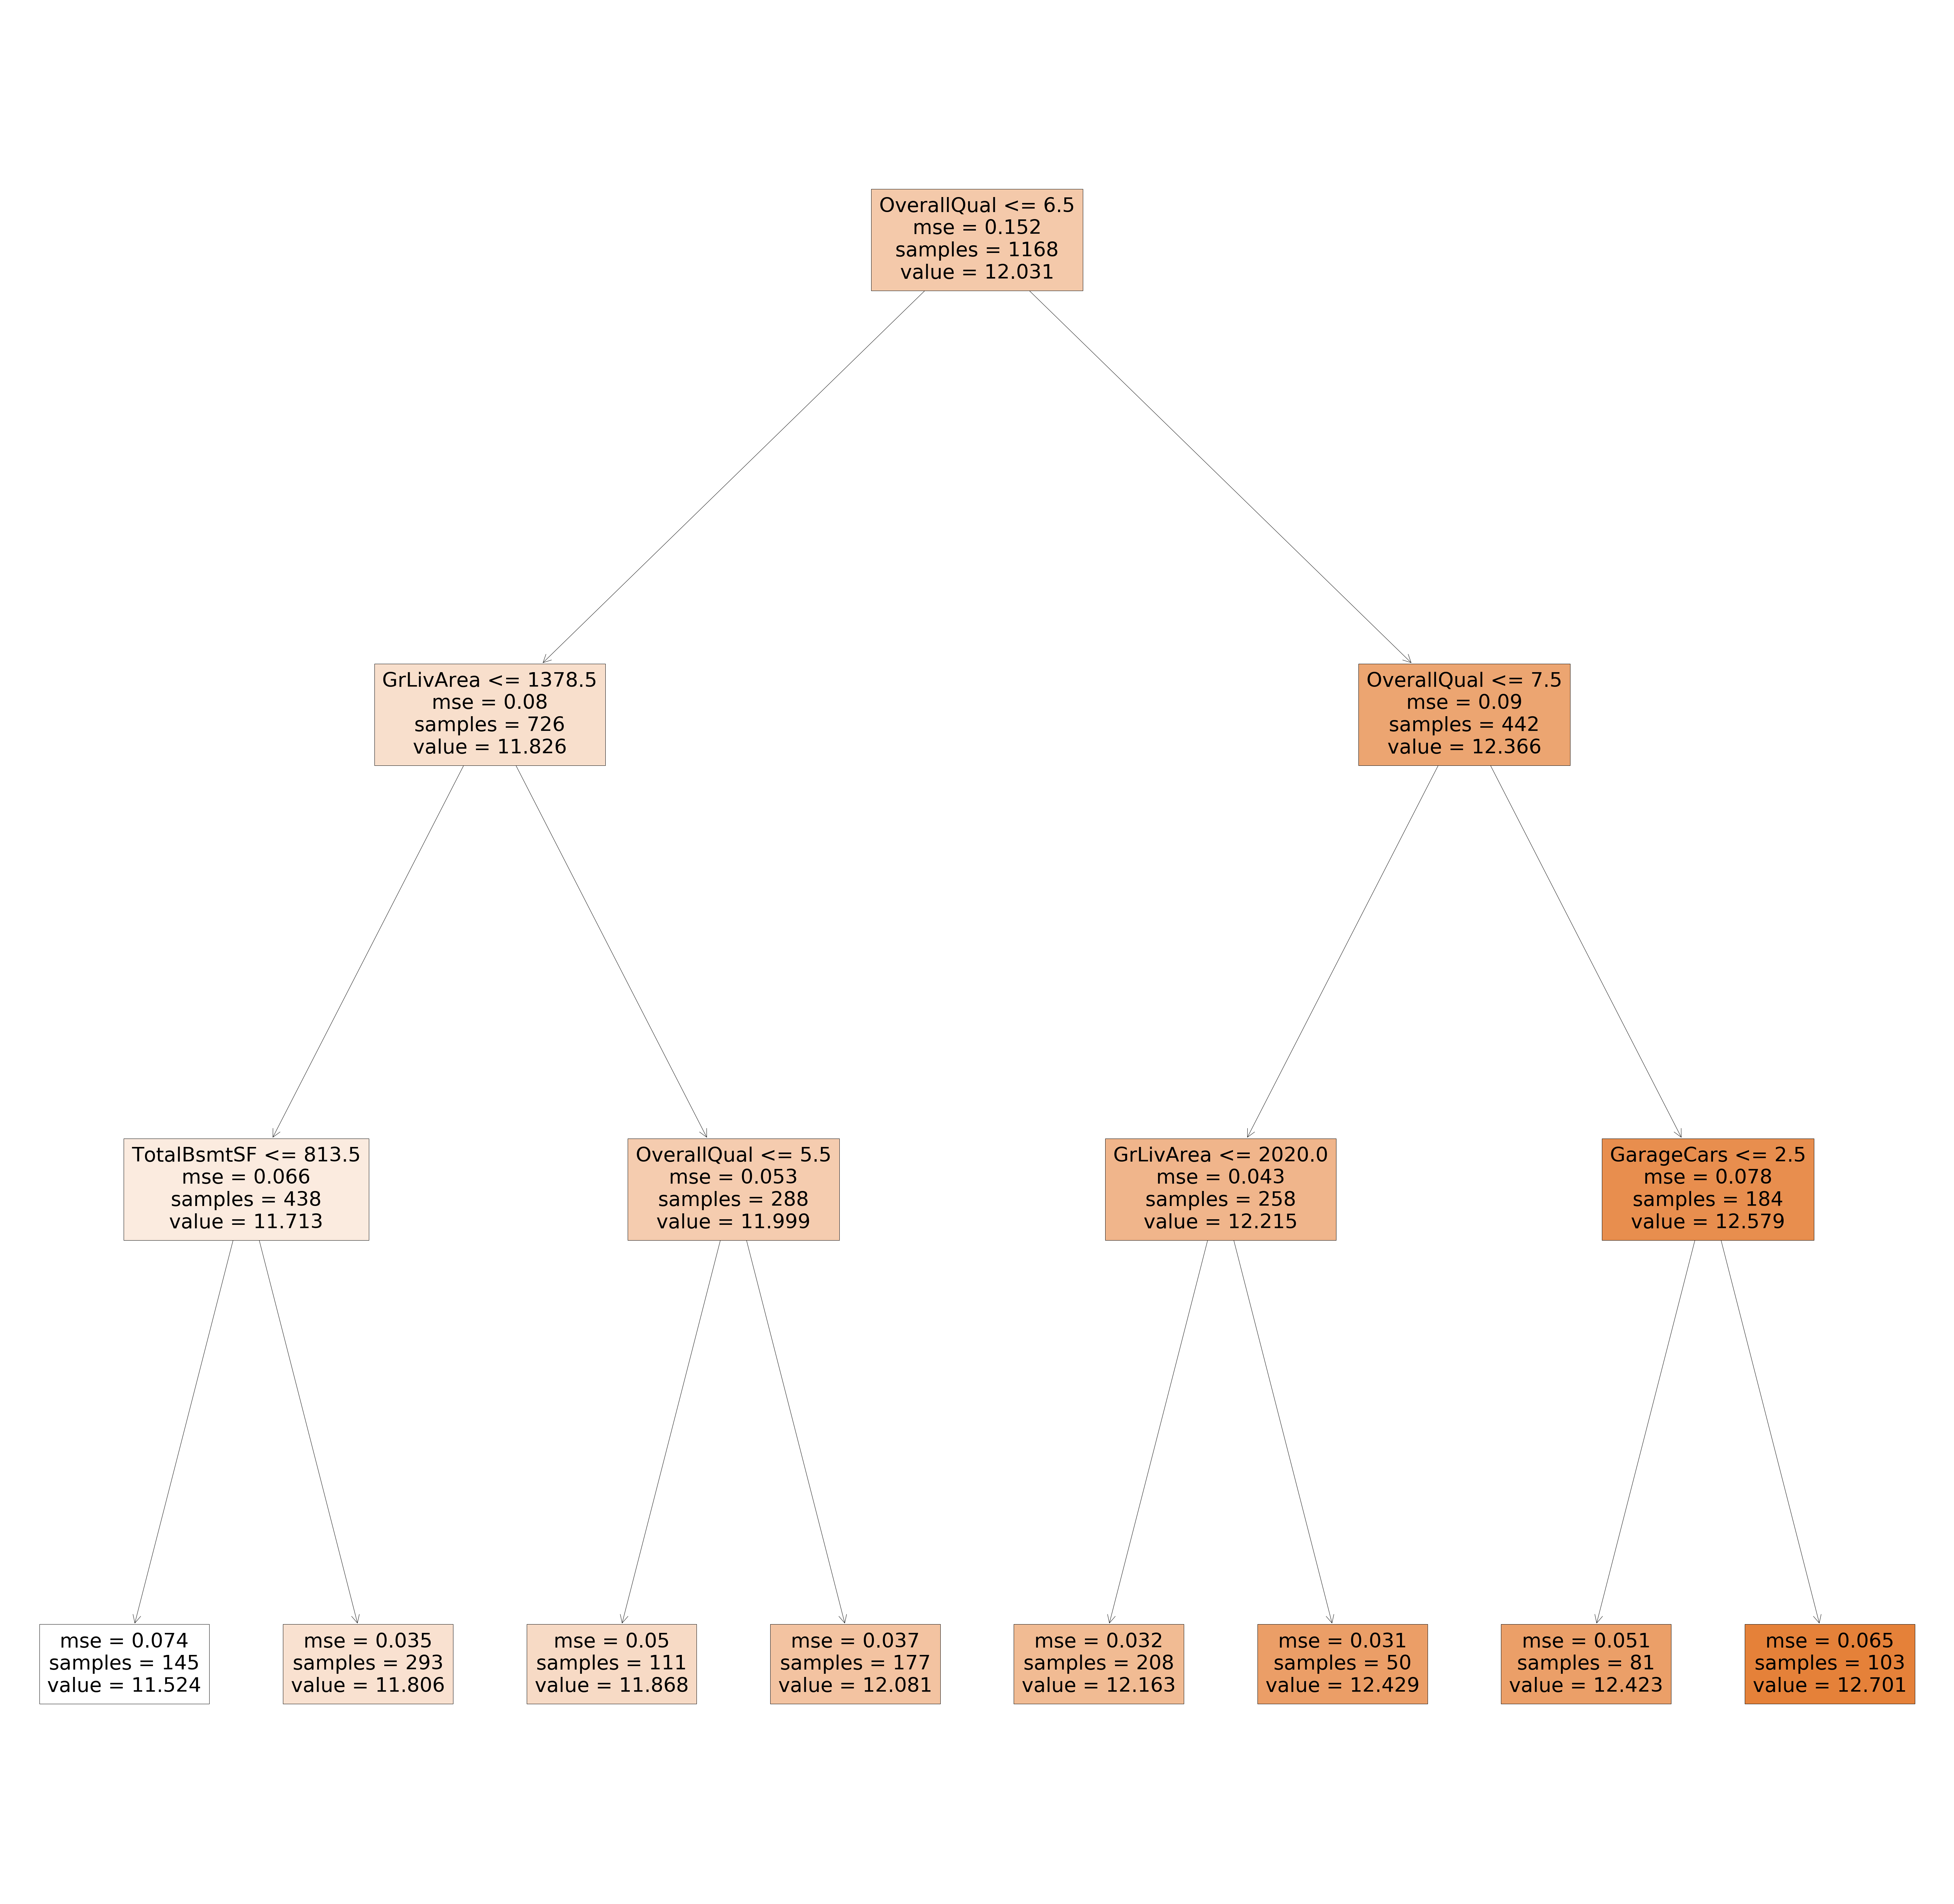

In [392]:
draw_tree(m.estimators_[0], x_train)

In [393]:
'''
Overall quality seems to be very important
'''

'\nOverall quality seems to be very important\n'

## Feature Selection

In [394]:
m = RandomForestRegressor(n_jobs= -1, oob_score= True, random_state=42)
m.fit(x_train, y_train)
print_score(m)

[0.05350245120148564, 0.14693366597241592, 0.9812225801393076, 0.8843090125581666, 0.8629194026844691]


In [395]:
## At depth 3 Almost all the decision seems to be made by few variables. 
## As depth increases more variables are coming to be important

In [396]:
fi = rf_feat_imp(m, x_train)

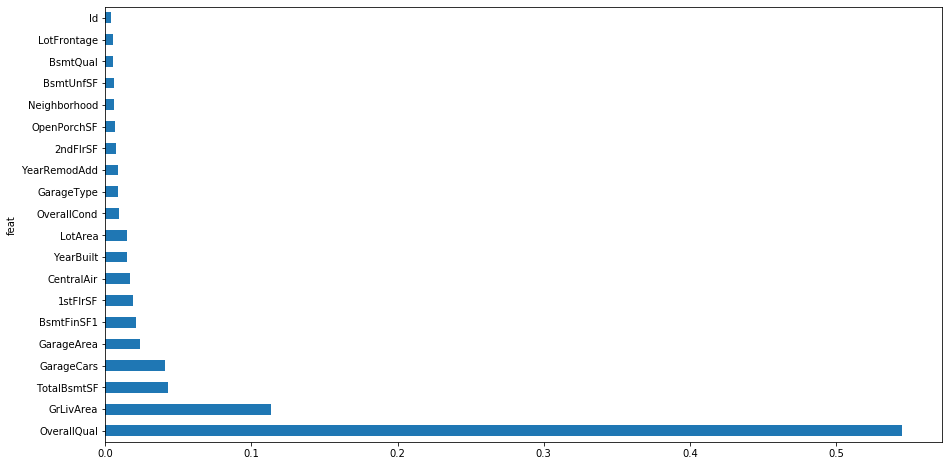

In [397]:
plot_fi(fi[:20])

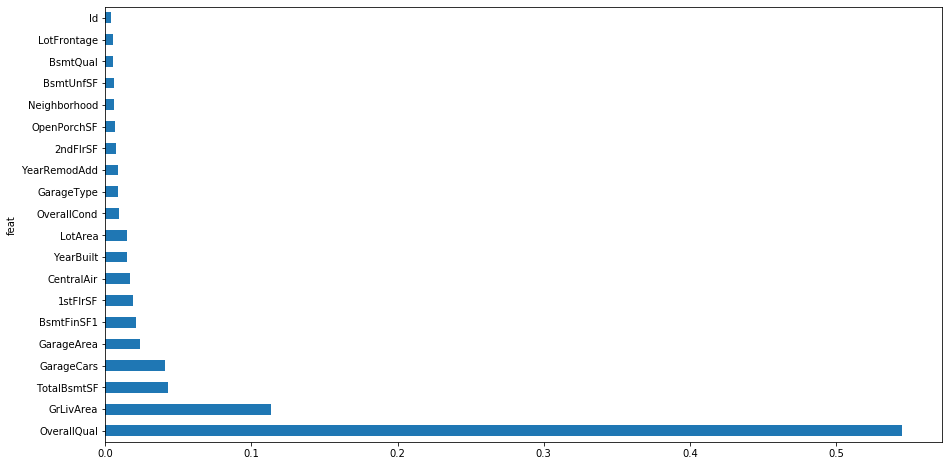

In [398]:
plot_fi(fi[:20])

In [399]:
to_keep = fi[fi.imp>= .005].feat; len(to_keep)

19

In [400]:
x_train = x_train[to_keep]
x_val = x_val[to_keep]

In [401]:
m = RandomForestRegressor(n_jobs= -1, oob_score= True, random_state=42)
m.fit(x_train, y_train)
print_score(m)

[0.05392682314243928, 0.14927367149072596, 0.9809235204613742, 0.8805947757186527, 0.8610078552671199]


In [328]:
## There is a small decrease in performance after dropping a lot of columns

## Tuning Parameters

In [329]:
# min_samples_leaf
# max_features

In [402]:
min_samples_leaf = [1,3,5,7]
max_features = [.5, .66, "log2", "sqrt", .33]

In [403]:
for msl in min_samples_leaf:
    for f in max_features:
        m = RandomForestRegressor(n_jobs= -1, oob_score= True, random_state=42, 
                                  min_samples_leaf=msl, max_features= f)
        m.fit(x_train, y_train)
        print("###################")
        print("min_sample_leaf:{}".format(msl))
        print("max_features:{}".format(f))
        print_score(m)
        print("###################")

###################
min_sample_leaf:1
max_features:0.5
[0.05272155414723017, 0.15008688700774267, 0.9817667130771714, 0.8792902365103501, 0.8666443360110052]
###################
###################
min_sample_leaf:1
max_features:0.66
[0.052630969339366396, 0.14816602866547365, 0.9818293151722978, 0.882360226329715, 0.8675719039772208]
###################
###################
min_sample_leaf:1
max_features:log2
[0.053066618374463734, 0.15286455852824868, 0.9815272571391205, 0.8747809190168357, 0.8653516559591772]
###################
###################
min_sample_leaf:1
max_features:sqrt
[0.05306661837446375, 0.15286455852824876, 0.9815272571391205, 0.8747809190168356, 0.8653516559591772]
###################
###################
min_sample_leaf:1
max_features:0.33
[0.05230453427570031, 0.14796275561981156, 0.9820540176240232, 0.8826827913853178, 0.8686308530618696]
###################
###################
min_sample_leaf:3
max_features:0.5
[0.08196838724742754, 0.15054238977853657, 0.95592

In [404]:
min_samples_leaf = 1
max_features = .66

In [405]:
train_df_sel = train_df[x_train.columns]

In [406]:
train_df_sel

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,GarageArea,BsmtFinSF1,1stFlrSF,CentralAir,YearBuilt,LotArea,OverallCond,GarageType,YearRemodAdd,2ndFlrSF,OpenPorchSF,Neighborhood,BsmtUnfSF,BsmtQual,LotFrontage
0,7,1710,856,2,548,706,856,2,2003,8450,5,2,2003,854,61,6,150,2,65.0
1,6,1262,1262,2,460,978,1262,2,1976,9600,8,2,1976,0,0,25,284,2,80.0
2,7,1786,920,2,608,486,920,2,2001,11250,5,2,2002,866,42,6,434,2,68.0
3,7,1717,756,3,642,216,961,2,1915,9550,5,6,1970,756,35,7,540,3,60.0
4,8,2198,1145,3,836,655,1145,2,2000,14260,5,2,2000,1053,84,16,490,2,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,953,2,460,0,953,2,1999,7917,5,2,2000,694,40,9,953,2,62.0
1456,6,2073,1542,2,500,790,2073,2,1978,13175,6,2,1988,0,0,15,589,2,85.0
1457,7,2340,1152,1,252,275,1188,2,1941,9042,9,2,2006,1152,60,7,877,3,66.0
1458,5,1078,1078,1,240,49,1078,2,1950,9717,6,2,1996,0,0,13,0,3,68.0


In [407]:
m = RandomForestRegressor(n_jobs= -1, oob_score= True, random_state=42, 
                                  min_samples_leaf=min_samples_leaf, max_features= max_features)
m.fit(train_df_sel,y)

m.oob_score_

0.8733860922114741

In [336]:
create_submission("sub_2")


## Tuning Parameters

In [408]:
import scipy

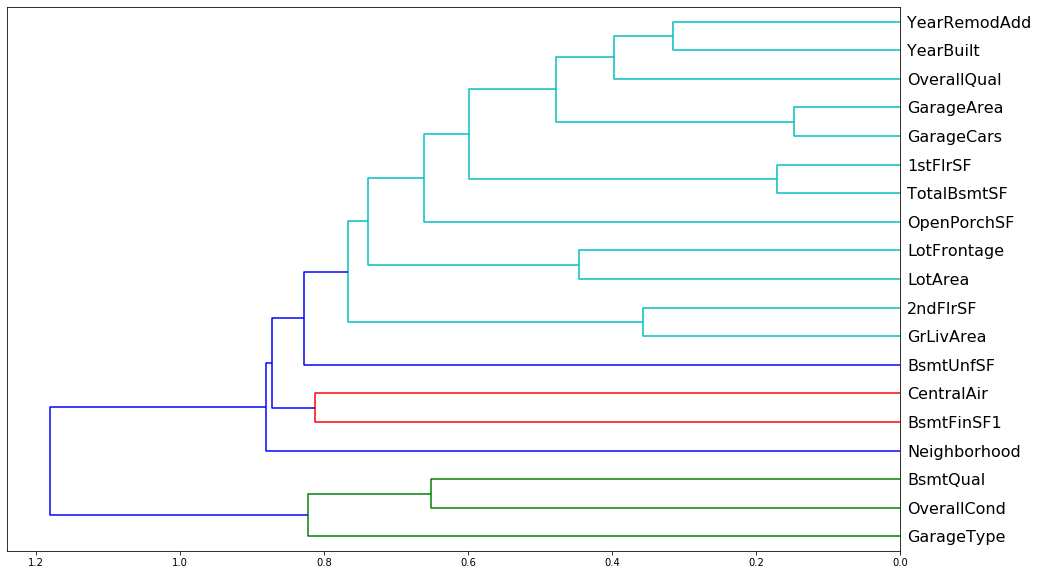

In [409]:
plot_corr_dendogram(train_df_sel) ## There are no correlated features

In [339]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,1,60,4,65.0,8450,2,0,4,4,1,...,0,0,0,2,2008,9,5,False,False,False
1,2,20,4,80.0,9600,2,0,4,4,1,...,0,0,0,5,2007,9,5,False,False,False
2,3,60,4,68.0,11250,2,0,1,4,1,...,0,0,0,9,2008,9,5,False,False,False
3,4,70,4,60.0,9550,2,0,1,4,1,...,0,0,0,2,2006,9,1,False,False,False
4,5,60,4,84.0,14260,2,0,1,4,1,...,0,0,0,12,2008,9,5,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,4,62.0,7917,2,0,4,4,1,...,0,0,0,8,2007,9,5,False,False,False
1456,1457,20,4,85.0,13175,2,0,4,4,1,...,3,0,0,2,2010,9,5,False,False,False
1457,1458,70,4,66.0,9042,2,0,4,4,1,...,1,3,2500,5,2010,9,5,False,False,False
1458,1459,20,4,68.0,9717,2,0,4,4,1,...,0,0,0,4,2010,9,5,False,False,False


## Tuning XGBoost

In [410]:
param = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [411]:
from xgboost import XGBRegressor

In [412]:
train_df_sel = train_df[x_train.columns]

m = RandomForestRegressor(n_estimators= 2500, n_jobs= -1, oob_score= True, random_state=42, 
                                  min_samples_leaf=min_samples_leaf, max_features= max_features)
m.fit(train_df_sel,y)

m.oob_score_

0.8785868242257254

In [413]:
print_score(m)

[0.050553166922790625, 0.05419677046253375, 0.9832357050700485, 0.9842600366996633, 0.8785868242257254]


In [414]:
create_submission("sub_3")

In [499]:
m = XGBRegressor(learning_rate =0.2,
 n_estimators=2000, max_depth = 4, n_jobs = 3,colsample_bytree = .5, min_child_weight = 3,
                num_parallel_tree=3, subsample = .8, random_state = 42)

In [500]:
m.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.2, max_delta_step=0, max_depth=4,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=2000, n_jobs=3, num_parallel_tree=3,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.8, tree_method=None,
             validate_parameters=False, verbosity=None)

In [501]:
print_score(m)

[0.0016431350087269063, 0.14225883379733517, 0.999982289327361, 0.8915535381177773]


In [502]:
m.fit(train_df_sel, y)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.2, max_delta_step=0, max_depth=4,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=2000, n_jobs=3, num_parallel_tree=3,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.8, tree_method=None,
             validate_parameters=False, verbosity=None)

In [504]:
create_submission("sub_4")

In [505]:
### Other models Extra Tree Regressor
### LightGBM
### Ensemble the results

In [506]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
sklearn.ensemble.ExtraTreesRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=False, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

In [516]:
m = ExtraTreesRegressor(n_estimators= 2500, n_jobs= -1, oob_score= False, random_state=42, 
                                  min_samples_leaf=1, max_features= "sqrt", bootstrap=False)
m.fit(x_train,y_train)

print_score(m)

[0.001524014536179624, 0.15338018170695272, 0.9999847641468974, 0.8739347483433277]


In [524]:
m = RandomForestRegressor(n_estimators= 2500, n_jobs= -1, oob_score= True, random_state=42, 
                                  min_samples_leaf=min_samples_leaf, max_features= .66, bootstrap=True,
                         max_depth=12)
m.fit(x_train,y_train)

print_score(m)

[0.05405501076337614, 0.1481910621721447, 0.9808327205667576, 0.8823204711325559, 0.8721641184054366]


In [ ]:
[0.05128721519253899, 0.14830171609299203, 0.9827453245639861, 0.8821446634594247, 0.872348299951983]

In [526]:
!pip install lightgbm

     |████████████████████████████████| 1.2 MB 2.7 MB/s eta 0:00:01


In [527]:
import lightgbm as lgb

In [528]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_curve, auc, accuracy_score)
from sklearn.model_selection import GridSearchCV

In [529]:
params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 3, # Updated from nthread
          'num_leaves': 64,
          'learning_rate': 0.05,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 5,
          'reg_lambda': 10,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'}


In [530]:
gridParams = {
    'learning_rate': [0.005],
    'n_estimators': [40],
    'num_leaves': [6,8,12,16],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [501], # Updated from 'seed'
    'colsample_bytree' : [0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

In [531]:
mdl = lgb.LGBMRegressor(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 3, # Updated from 'nthread'
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'])


In [532]:
mdl.get_params().keys()

# Create the grid
grid = GridSearchCV(mdl, gridParams,
                    verbose=0,
                    cv=4,
                    n_jobs=2)
# Run the grid
grid.fit(x_train, y_train)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

{'boosting_type': 'gbdt', 'colsample_bytree': 0.65, 'learning_rate': 0.005, 'n_estimators': 40, 'num_leaves': 6, 'objective': 'binary', 'random_state': 501, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.7}
-807.9971770134442


In [533]:
print_score(grid)

[11.037559755643251, 11.006127949667594, -798.1617580401896, -648.1215297893922]
